In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('cleaned_data.csv')

In [4]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,average_salary,same_state,age,python_yn,R_yn,spark,aws,desc_len,num_comp,excel
count,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000
mean,3.618893,1836.981107,0.032389,0.022942,74.709852,128.143050,100.616734,0.558704,49.379217,0.529015,0.002699,0.225371,0.237517,3869.387314,1.055331,0.522267
std,0.801751,497.497008,0.177150,0.149820,31.000362,45.250516,38.881371,0.496877,53.998629,0.499495,0.051917,0.418109,0.425849,1522.517428,1.384632,0.499841
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.000000,124.000000,97.500000,1.000000,27.000000,1.000000,0.000000,0.000000,0.000000,3731.000000,0.000000,1.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,62.000000,1.000000,0.000000,0.000000,0.000000,4740.000000,3.000000,1.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,279.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000,1.000000


In [5]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'company_txt', 'job_state', 'job_simp', 'seniority',
       'same_state', 'age', 'python_yn', 'R_yn', 'spark', 'aws', 'desc_len',
       'num_comp', 'excel'],
      dtype='object')

<Axes: >

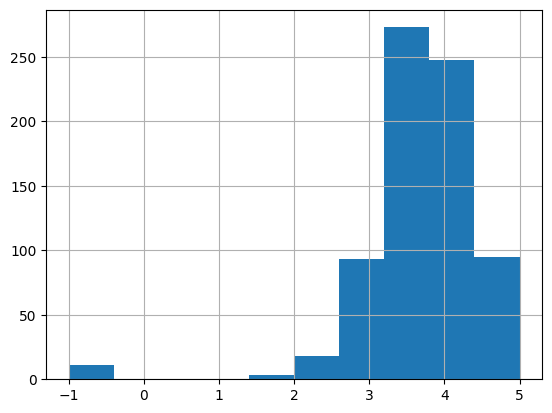

In [14]:
df.Rating.hist()
#Normally distributed

<Axes: >

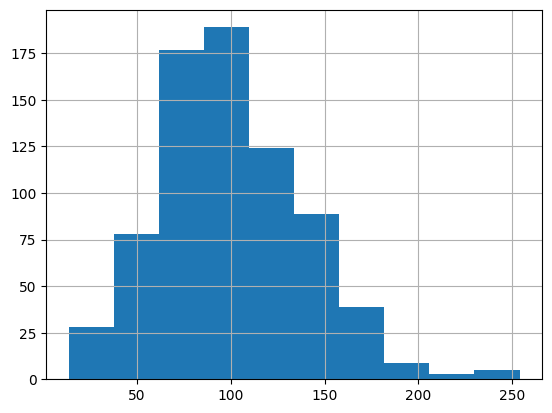

In [6]:
df.average_salary.hist()
#Normal distrobution

<Axes: >

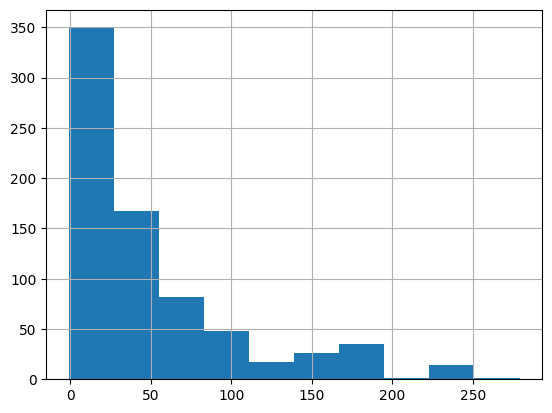

In [7]:
df.age.hist()
#exponential distoribution - will need to normalise later

<Axes: >

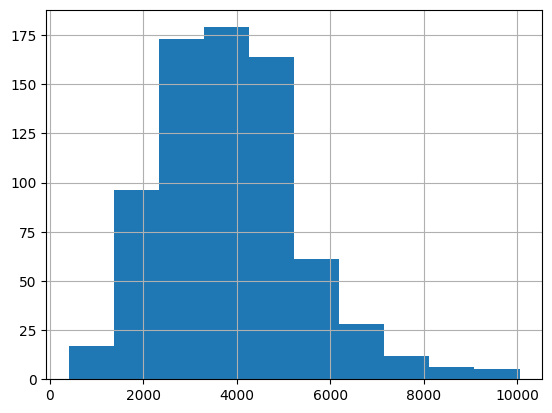

In [9]:
df.desc_len.hist()

In [11]:
df[['age','average_salary','Rating','desc_len']].corr()

,age,average_salary,Rating,desc_len
age,1.000000,0.019377,0.026169,0.164718
average_salary,0.019377,1.000000,0.013498,0.078792
Rating,0.026169,0.013498,1.000000,-0.012278
desc_len,0.164718,0.078792,-0.012278,1.000000


<Axes: >

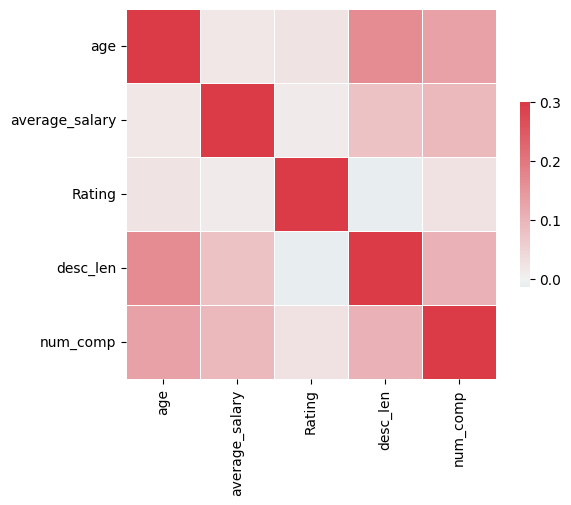

In [13]:
#to see the level of corelation between the continous variables

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','average_salary','Rating','desc_len','num_comp']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [14]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'job_state','same_state', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority']]

Graph for Location: total = 199


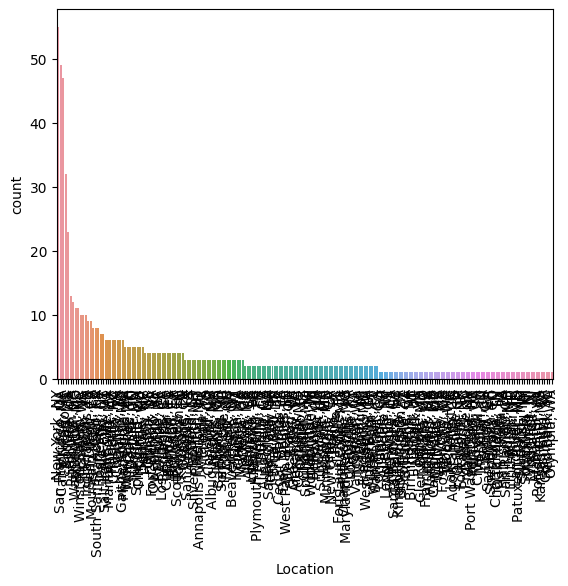

Graph for Headquarters: total = 197


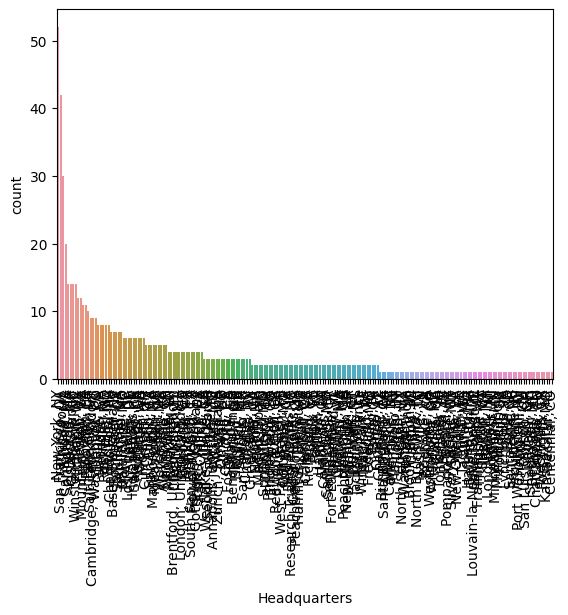

Graph for Size: total = 9


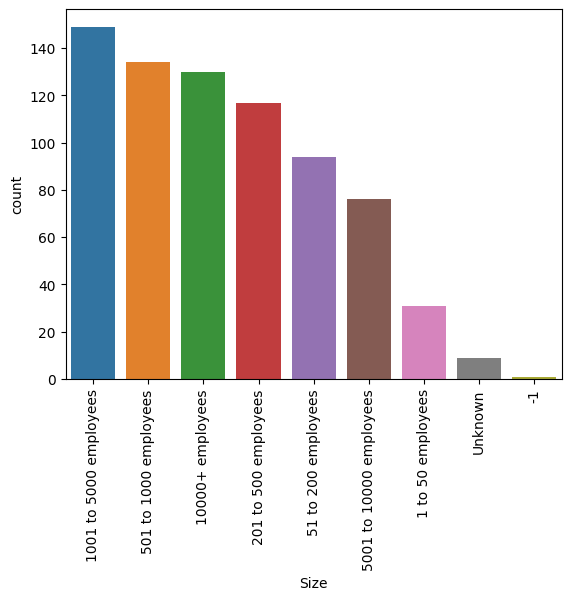

Graph for Type of ownership: total = 11


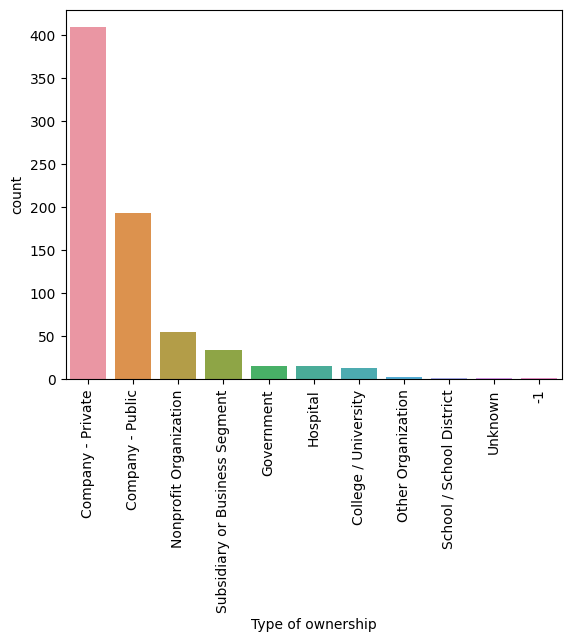

Graph for Industry: total = 60


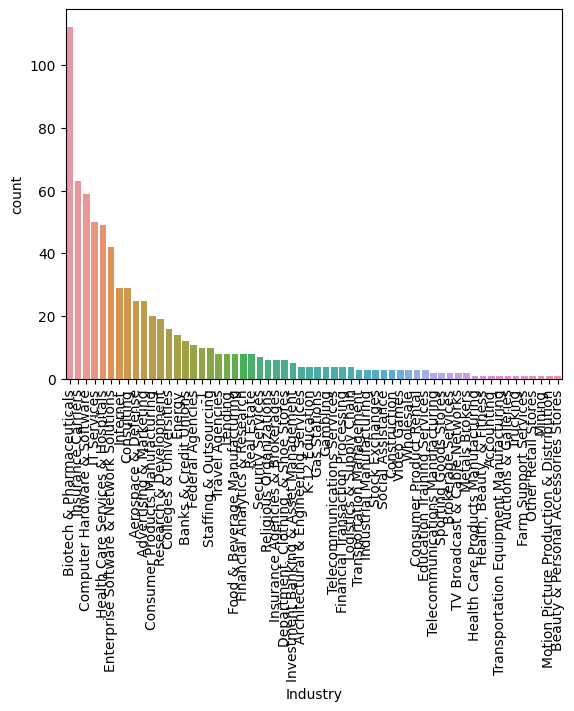

Graph for Sector: total = 25


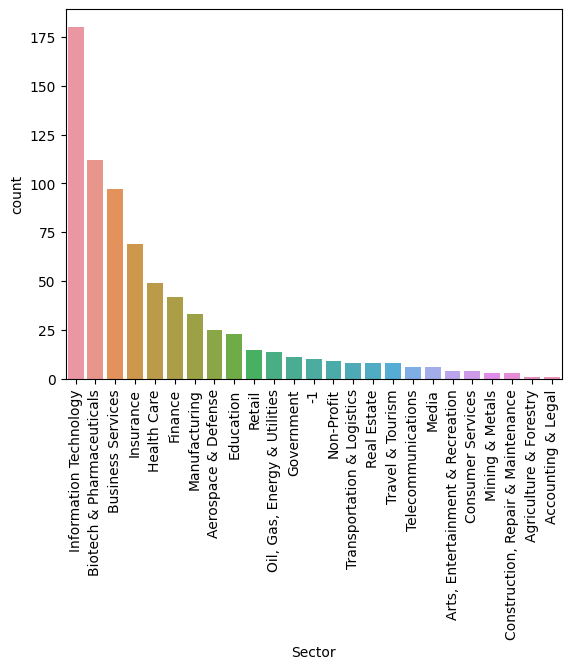

Graph for Revenue: total = 14


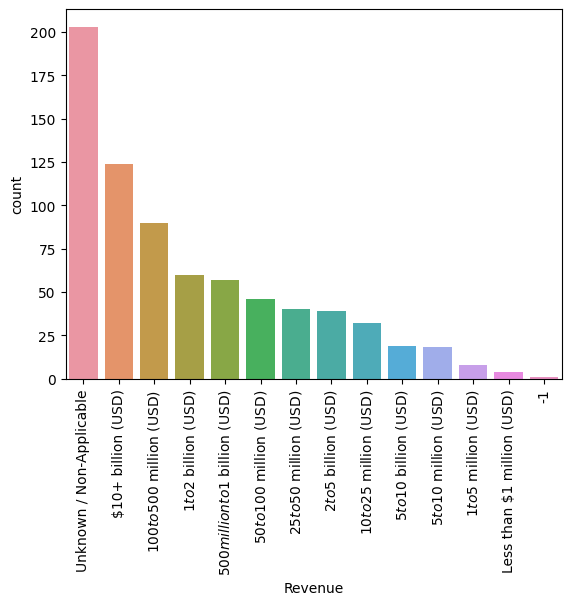

Graph for company_txt: total = 342


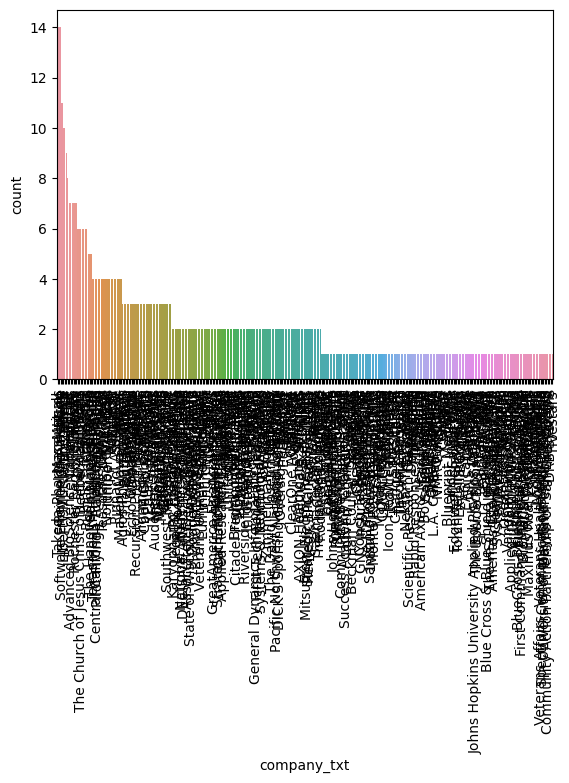

Graph for job_state: total = 37


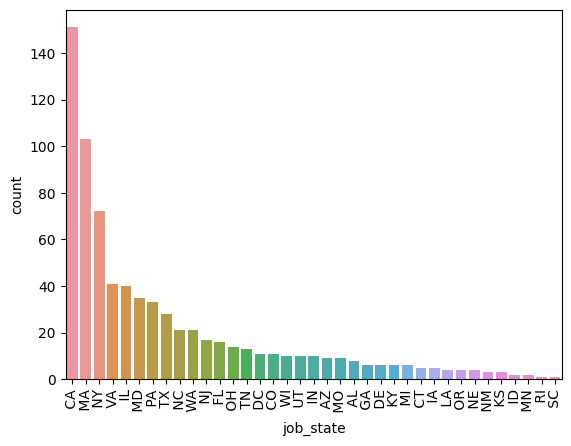

Graph for same_state: total = 2


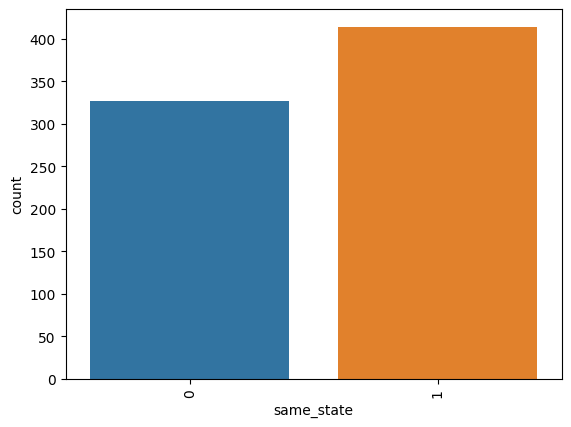

Graph for python_yn: total = 2


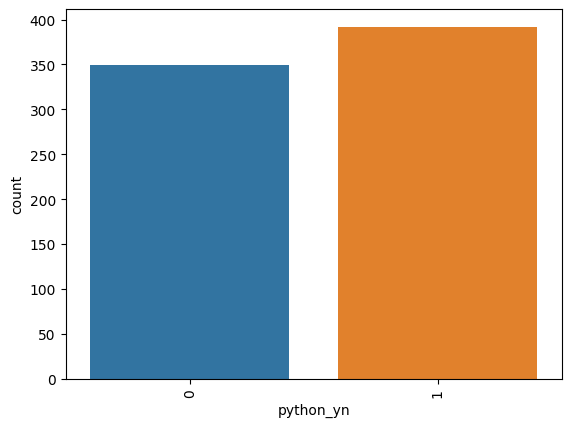

Graph for R_yn: total = 2


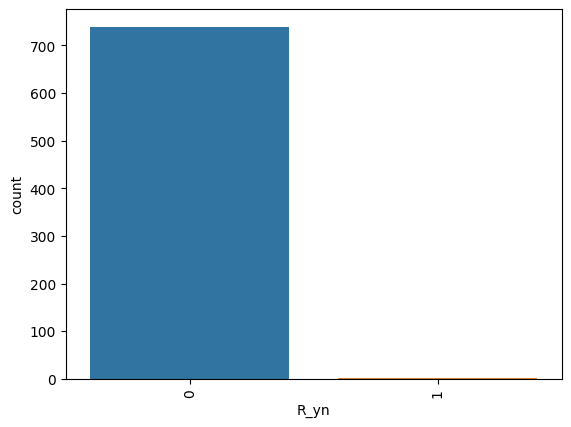

Graph for spark: total = 2


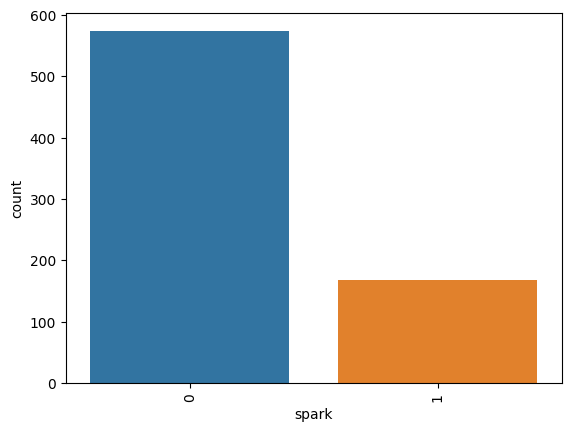

Graph for aws: total = 2


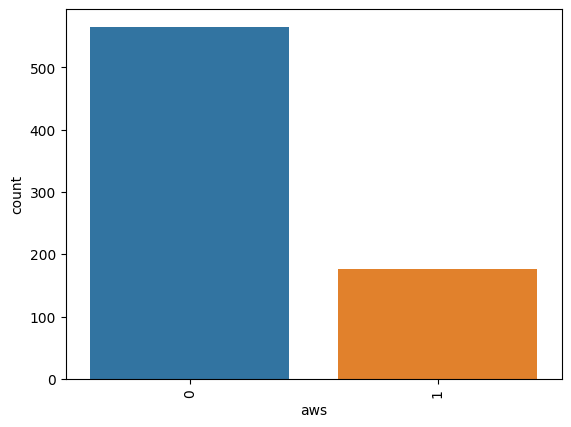

Graph for excel: total = 2


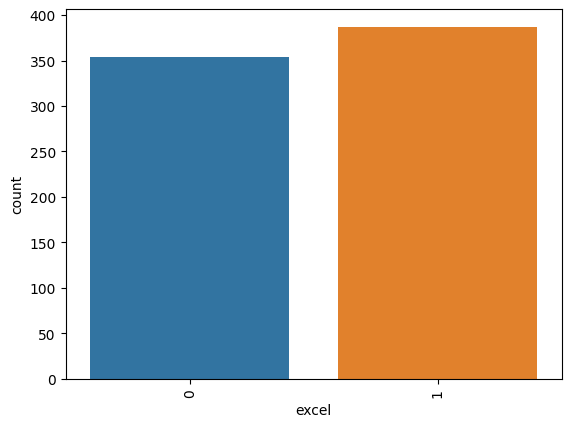

Graph for job_simp: total = 7


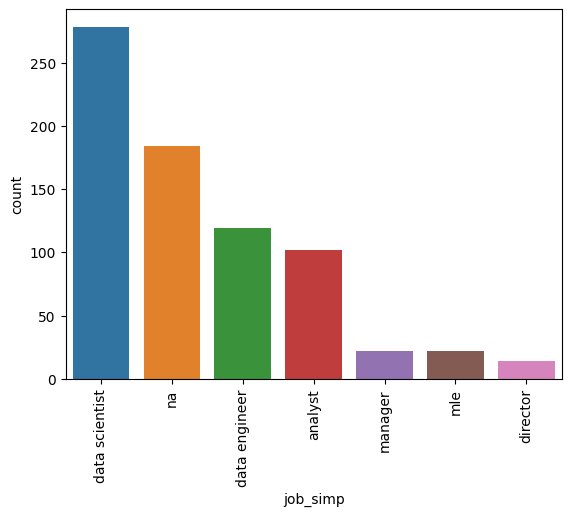

Graph for seniority: total = 3


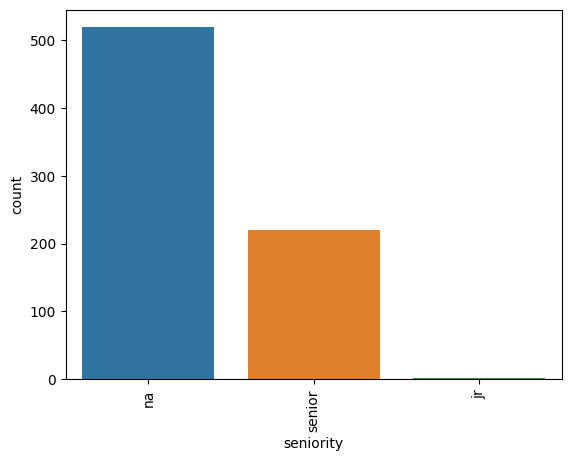

In [18]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("Graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Graph for location: total = 20


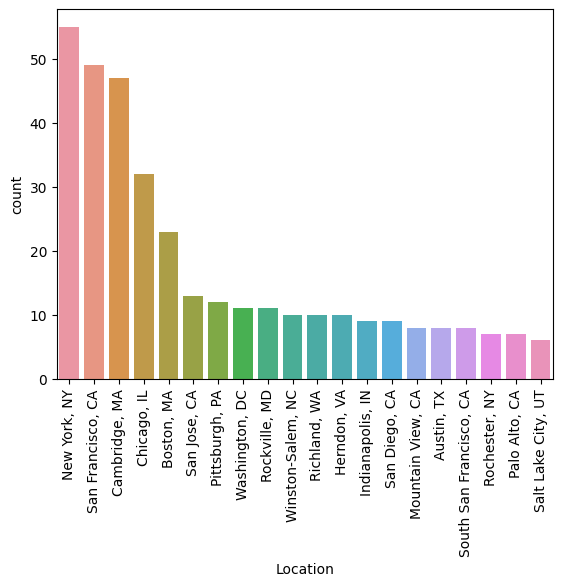

Graph for headquarters: total = 20


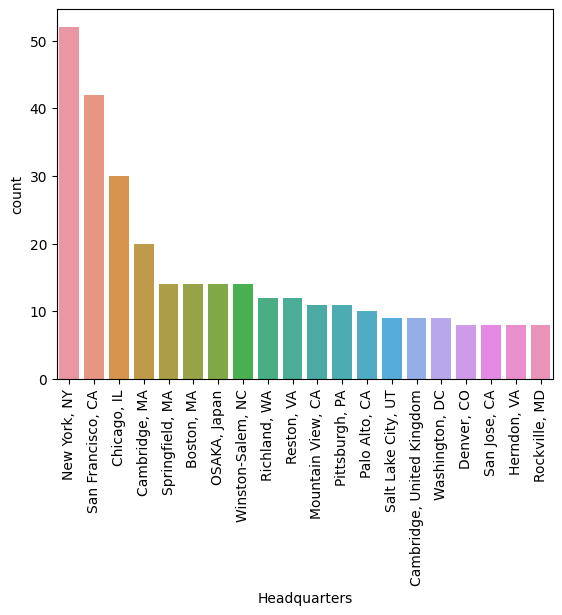

Graph for company_txt: total = 20


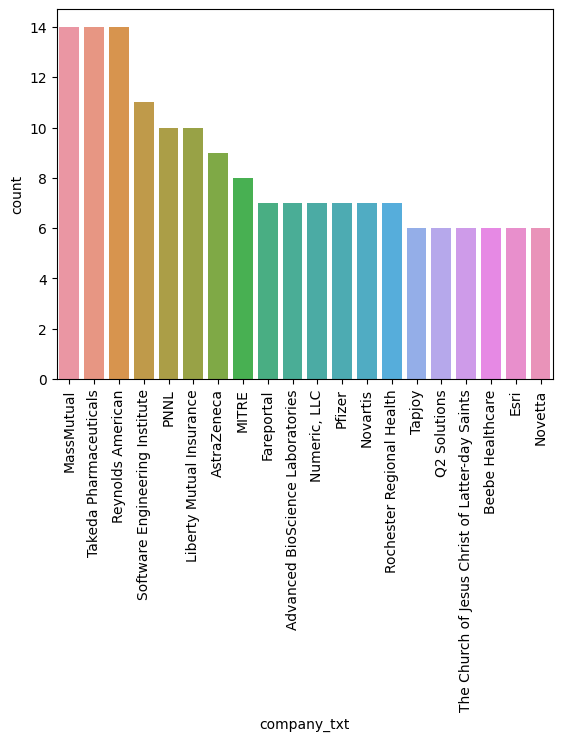

In [21]:
for i in df_cat[['Location','Headquarters','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("Graph for %s: total = %d" % (i.lower()  , len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [22]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'company_txt', 'job_state', 'job_simp', 'seniority',
       'same_state', 'age', 'python_yn', 'R_yn', 'spark', 'aws', 'desc_len',
       'num_comp', 'excel'],
      dtype='object')

In [23]:
pd.pivot_table(df, index= ['job_simp','seniority'], values='average_salary')

average_salary
job_simp       seniority                
analyst        jr              56.500000
               na              61.155405
               senior          79.092593
data engineer  na              96.701220
               senior         124.689189
data scientist jr             106.500000
               na             107.040541
               senior         138.956522
director       na             168.607143
manager        na              84.022727
mle            na             119.133333
               senior         142.071429
na             na              73.988189
               senior         109.061404

In [25]:
pd.pivot_table(df, index= 'job_state', values='average_salary').sort_values('average_salary', ascending = False)

,average_salary
job_state,
CA,123.619205
IL,116.662500
DC,110.181818
MA,106.281553
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778
NC,98.452381


In [29]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)


pd.pivot_table(df, index = ['job_state','job_simp'], values = 'average_salary').sort_values('job_state', ascending = False)


average_salary
job_state job_simp                      
 WI       na                   54.000000
          data scientist      113.500000
          analyst              58.833333
 WA       na                   97.500000
          data scientist       99.764706
          analyst              54.500000
 VA       na                   79.300000
          mle                  87.000000
          data scientist      108.416667
          data engineer        96.900000
          analyst              71.583333
 UT       data engineer       100.333333
          analyst              54.750000
          data scientist      140.500000
 TX       na                   41.285714
          data scientist      100.730769
          data engineer       113.062500
 TN       data scientist       96.000000
          data engineer       100.950000
          analyst              13.500000
 SC       na                   60.500000
 RI       analyst             100.000000
 PA       manager             109.666667
          data engineer        91.500000
          data scientist      113.333333
          analyst              62.750000
          mle                 120.500000
          na                   76.062500
 OR       data scientist       98.500000
          data engineer        73.000000
 OH       na                   91.166667
          data scientist      105.285714
          analyst              53.875000
 NY       na                   81.583333
          mle                 125.000000
          data scientist      115.250000
          data engineer        86.375000
          analyst              65.607143
 NM       data scientist       74.333333
 NJ       data scientist      106.875000
          analyst              83.583333
          data engineer       112.000000
          manager             109.500000
          director            161.500000
          na                   82.500000
 NE       na                   41.000000
 NC       na                   90.916667
          data scientist      117.000000
          data engineer       104.250000
 MO       na                   72.333333
          manager              40.500000
          data scientist      127.666667
          analyst              61.000000
 MN       data engineer        95.000000
          analyst              76.000000
 MI       manager              87.500000
          data scientist      106.625000
 MD       na                   88.750000
          data scientist      109.115385
          data engineer       109.000000
          analyst              80.666667
 MA       na                  107.478261
          manager              71.900000
          director            117.833333
          data scientist      113.750000
          data engineer       107.291667
          analyst              59.125000
 LA       analyst              48.000000
          data engineer        70.500000
          na                   20.000000
 KY       na                  103.500000
          data scientist       84.000000
 KS       mle                  87.000000
 IN       na                   69.000000
          data scientist       84.500000
          data engineer       114.500000
 IL       analyst              66.500000
          na                   57.166667
          mle                 133.000000
          director            221.750000
          data scientist      117.233333
          data engineer        96.125000
 ID       analyst              56.250000
 IA       analyst              43.000000
          data engineer       102.833333
 GA       data scientist       81.333333
          na                   80.000000
 FL       data scientist       97.357143
          data engineer        91.833333
          analyst              47.500000
 DE       na                   27.500000
 DC       data scientist      149.000000
          data engineer        85.000000
          analyst              63.500000
 CT       na                   62.500000
          data scientist       84.000000
 CO     

In [31]:
# rating, industry, sector, revenue, number of comp, hourly, employer provided, python, r, spark, aws, excel, desc_len, Type of onwership
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'employer_provided', 'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'Type of ownership','average_salary']]


In [39]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'average_salary').sort_values('average_salary', ascending = False))

Rating


KeyError: 'avg_salary'